In [6]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import *
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sklearn'

In [3]:
df = pd.read_csv("uber.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'uber.csv'

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.shape

(200000, 9)

In [7]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
df.dtypes

,0
Unnamed: 0,int64
key,object
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [10]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [11]:
df.drop(columns =["Unnamed: 0", "key"], inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [14]:
df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean(), inplace = True)
df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean(), inplace = True)

In [15]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


# PICKUP TIME PROCESSING

In [16]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [19]:
df["year"] = df["pickup_datetime"].dt.year
df["day_of_week"] = df["pickup_datetime"].dt.dayofweek
df["month"] = df["pickup_datetime"].dt.month
df["time"] = df["pickup_datetime"].dt.hour
df["day"] = df["pickup_datetime"].dt.day

In [22]:
df.drop(columns=["pickup_datetime"], inplace=True)

In [23]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day_of_week,month,time,day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,5,19,7
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,7,20,17
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,8,21,24
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,6,8,26
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,8,17,28


In [24]:
df.isnull().sum()

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
year,0
day_of_week,0
month,0
time,0


# Boxplots outliers


In [42]:
df_columns = df.columns
columns_to_inspect = df_columns[:-5]
columns_to_inspect

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [50]:
def plot_boxplots(df, columns_to_inspect):
  for column in columns_to_inspect :
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

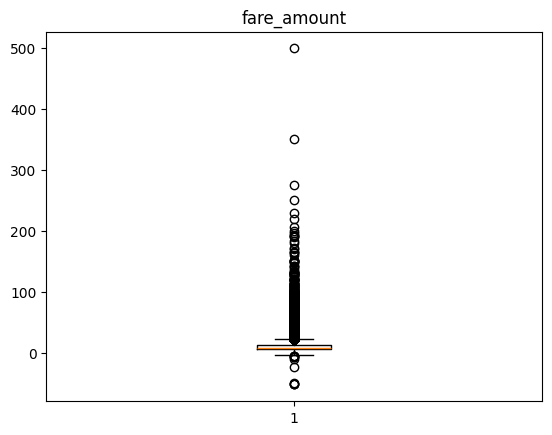

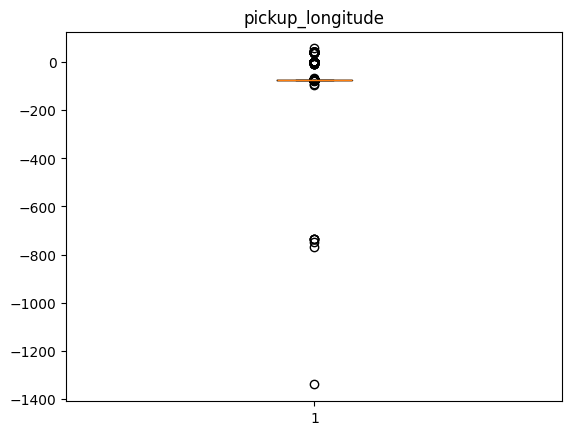

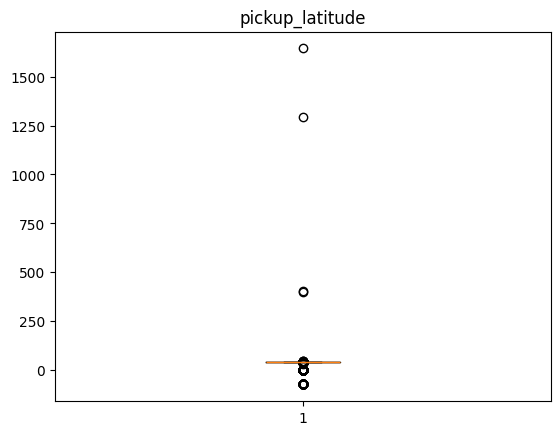

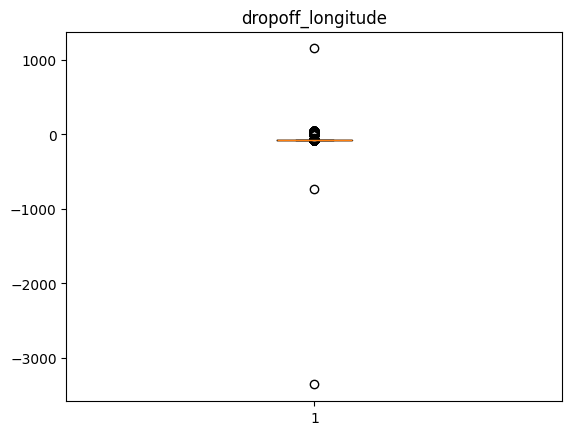

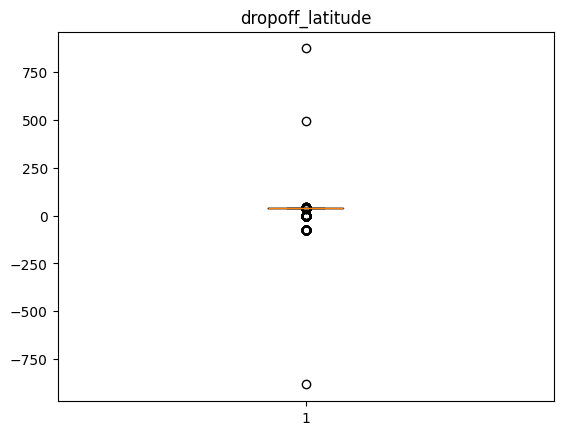

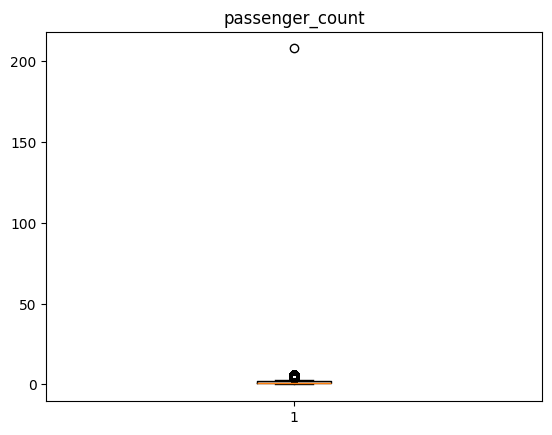

In [51]:
plot_boxplots(df, columns_to_inspect)

In [52]:
for col in columns_to_inspect:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  LB = Q1 - 1.5 * IQR
  UB = Q3 + 1.5 * IQR

  df = df[(df[col] >= LB) & (df[col] <= UB)]


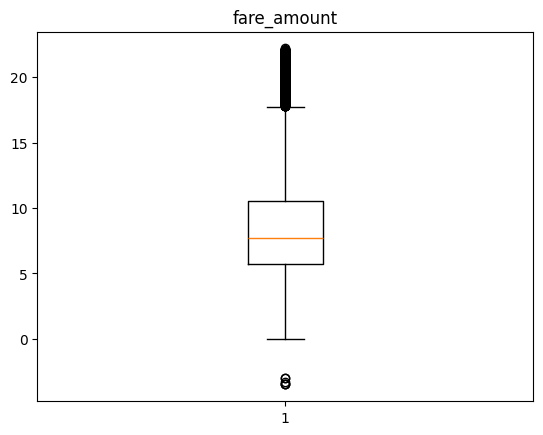

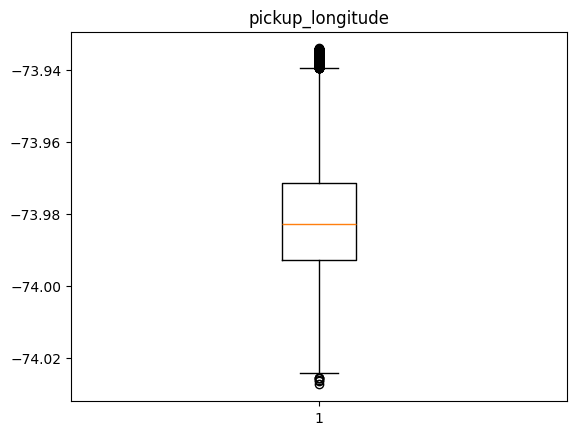

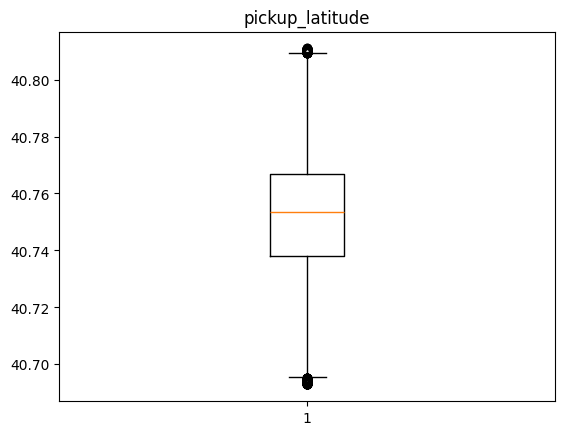

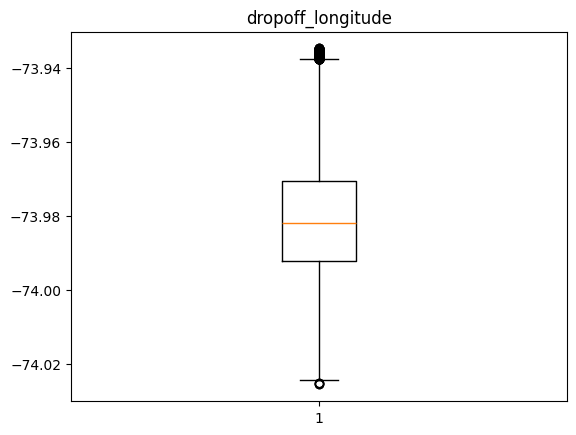

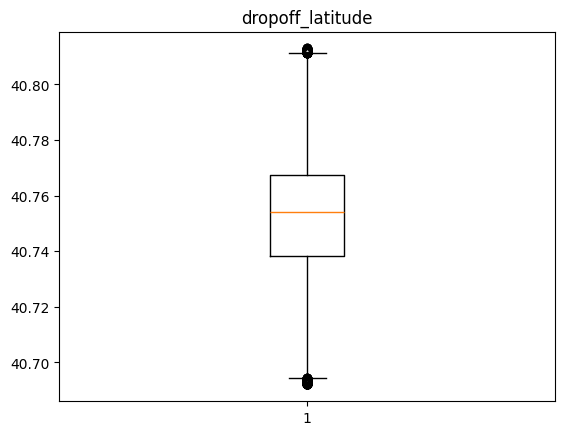

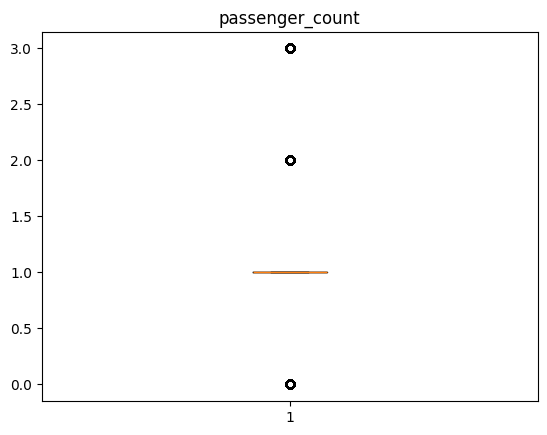

In [54]:
plot_boxplots(df, columns_to_inspect)

# Calculate distance

In [70]:
def calculate_dist(lon1, lat1, lon2, lat2):
    delta_lon = lon1 - lon2
    delta_lat = lat1 - lat2
    dist = np.sqrt(delta_lon**2 + delta_lat**2)
    return dist

In [71]:
df['distance'] = calculate_dist(df['pickup_longitude'], df['pickup_latitude'],
                               df['dropoff_longitude'], df['dropoff_latitude'])

In [72]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day_of_week,month,time,day,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,5,19,7,0.015140
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,7,20,17,0.022103
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,8,21,24,0.053109
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,6,8,26,0.016528
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2011,5,2,2,12,0.000000


In [75]:
df_corr=df.corr()
df_corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,day_of_week,month,time,day,distance
fare_amount,1.000000,-0.052798,-0.076539,-0.023167,-0.094152,0.019572,0.154908,0.012933,0.028798,0.006046,0.007224,0.810530
pickup_longitude,-0.052798,1.000000,0.693656,0.409016,0.353741,-0.022952,-0.002829,-0.034310,-0.002471,0.013539,-0.004946,-0.038572
pickup_latitude,-0.076539,0.693656,1.000000,0.334680,0.499956,-0.019989,-0.001225,-0.050805,0.002275,0.034327,-0.001917,-0.065322
dropoff_longitude,-0.023167,0.409016,0.334680,1.000000,0.651683,-0.016413,0.004697,-0.027932,-0.004680,0.000404,-0.010045,0.033669
dropoff_latitude,-0.094152,0.353741,0.499956,0.651683,1.000000,-0.013321,0.001876,-0.038742,-0.000405,0.026124,-0.006094,-0.035477
passenger_count,0.019572,-0.022952,-0.019989,-0.016413,-0.013321,1.000000,-0.022708,0.065425,0.007192,0.034175,0.001036,0.012285
year,0.154908,-0.002829,-0.001225,0.004697,0.001876,-0.022708,1.000000,0.006506,-0.114230,0.005443,-0.009239,-0.018386
day_of_week,0.012933,-0.034310,-0.050805,-0.027932,-0.038742,0.065425,0.006506,1.000000,-0.009308,-0.079647,0.005335,0.035474
month,0.028798,-0.002471,0.002275,-0.004680,-0.000405,0.007192,-0.114230,-0.009308,1.000000,-0.003213,-0.018587,0.001697
time,0.006046,0.013539,0.034327,0.000404,0.026124,0.034175,0.005443,-0.079647,-0.003213,1.000000,0.003957,-0.017409


<Axes: >

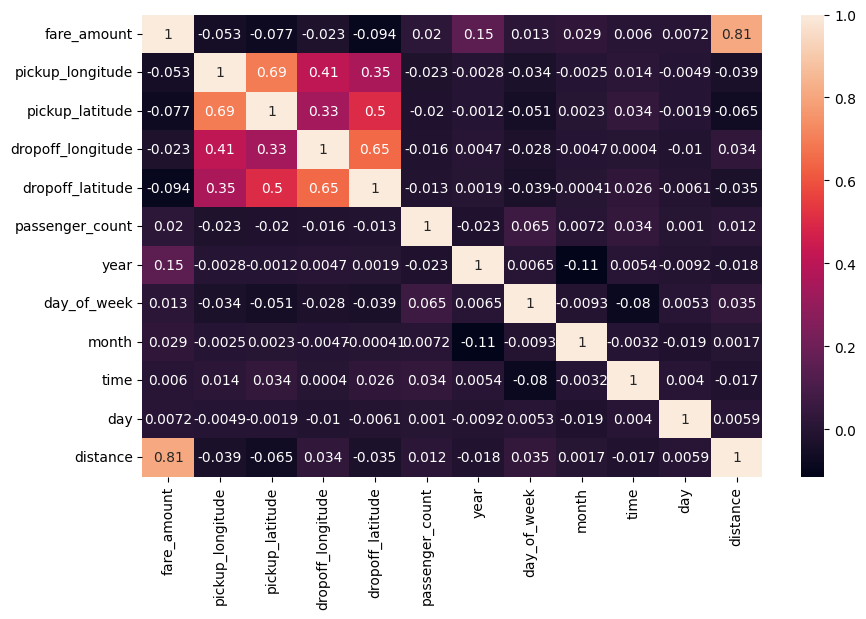

In [78]:
plt.figure(figsize = (10,6))
sns.heatmap(df_corr,annot=True)

In [80]:
# Dividing the dataset into feature and target values
df_x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','time','day','month','year','day_of_week','distance']]
df_y = df['fare_amount']

In [81]:
# Dividing the dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [82]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [87]:
y_pred_lin = lrmodel.predict(x_test)
print(y_pred_lin)

r2score = r2_score(y_test, y_pred_lin)
print("R2 Score is ", r2score)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print("Root Mean Squared Error(RMSE) ", rmse)

[ 7.41862644  5.83645913 11.38689621 ... 12.84117203  6.9134119
  8.29995603]
R2 Score is  0.6925107969383626
Root Mean Squared Error(RMSE)  2.155494987159943


In [85]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [88]:
y_pred_rf = rf.predict(x_test)
print(y_pred_rf)

[ 7.076   5.93   12.325  ... 12.1604  7.258   7.385 ]


In [89]:
r2score = r2_score(y_test, y_pred_rf)
print("R2 Score is ", r2score)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error(RMSE) ", rmse)

R2 Score is  0.7681549589065834
Root Mean Squared Error(RMSE)  1.87167736111861
